In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [88]:
#read the csv file
cwd = os.getcwd()
home_folder = os.path.dirname(cwd)
data_path = home_folder + '/labelers_weight.txt'
#set divider of cvs as ; and no coliumn names
df = pd.read_csv(data_path, sep=';', header=None)


#set the column names
df.columns = ['labeler', 'weight','lbl 0','lbl 1','lbl 2','lbl 3','lbl 255']
#set type of labeler as string
df['labeler'] = df['labeler'].astype(str)
#set type of weight as float
df['weight'] = df['weight'].astype(float)

df['goodness'] = 1 - df['weight']/(1024*1024)
#set type of label as float

df['lbl 0'] = df['lbl 0'].astype(float)
df['lbl 1'] = df['lbl 1'].astype(float)
df['lbl 2'] = df['lbl 2'].astype(float)
df['lbl 3'] = df['lbl 3'].astype(float)
df['lbl 255'] = df['lbl 255'].astype(float)
#mean between the just the >0 labels
df['mean_positive'] =  df[['lbl 0', 'lbl 1', 'lbl 2', 'lbl 3', 'lbl 255']].apply(lambda row: row[row > 0].mean(), axis=1)
#put nan in the label thath are 0
df['lbl 0'] = df['lbl 0'].replace(0, np.nan)
df['lbl 1'] = df['lbl 1'].replace(0, np.nan)
df['lbl 2'] = df['lbl 2'].replace(0, np.nan)
df['lbl 3'] = df['lbl 3'].replace(0, np.nan)
df['lbl 255'] = df['lbl 255'].replace(0, np.nan)



Summarize dataset:  94%|█████████▍| 78/83 [00:08<00:00,  5.36it/s, Missing diagram heatmap]             d:\AnacondaEnvs\gpu_2\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)
d:\AnacondaEnvs\gpu_2\Lib\site-packages\ydata_profiling\model\missing.py:78: UserWarning: There was an attempt to generate the Heatmap missing values diagrams, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(missing_diagrams={"Heatmap": False}`)
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: '--'')
  warnings.warn(
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 62.46it/s]


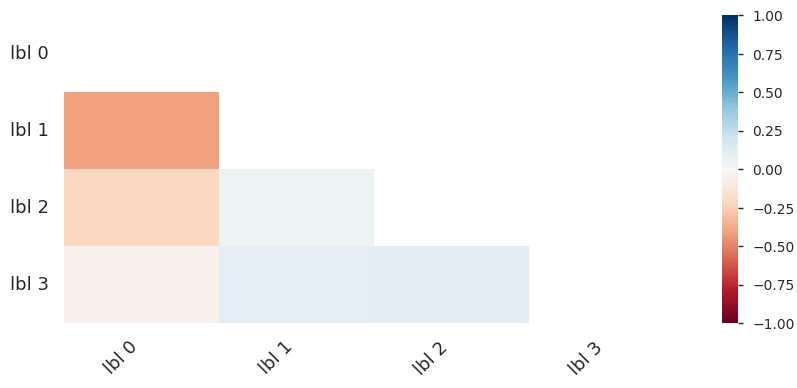

In [89]:
import pandas as pd
from ydata_profiling import ProfileReport


profile = ProfileReport(df, title="Profiling Report")
profile.to_file("your_report.html")

In [90]:
#calculate the mean the medianm the mode and teh standard deviation
mean = df['weight'].mean()
median = df['weight'].median()
mode = df['weight'].mode()
std = df['weight'].std()

print('Mean: ', mean)
print('Median: ', median)
print('Standard Deviation: ', std)

Mean:  273262.6029023276
Median:  218372.25
Standard Deviation:  192905.5275746071


In [91]:

def detect_outliers(data):
    outliers=[]
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    
    for i in data:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

1.4443669688215957
145
10039


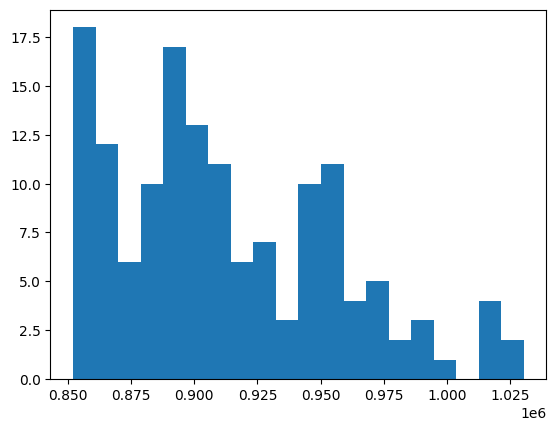

In [92]:
outliers = detect_outliers(df['weight'])
plt.hist(outliers, bins=20)
print(len(outliers)/len(df['weight'])*100)
print(len(outliers))
print(len(df['weight']))

In [93]:
#drop the outliers
#df = df[~df['weight'].isin(outliers)]
df = df[df['weight'].isin(outliers)]

In [94]:
#save the cleaned data in a new csv file
df_save = df["labeler"]
#df_save.to_csv(home_folder + '/cleaned_labelers_weight.csv', sep=';', index=False)
df_save.to_csv(home_folder + '/outlier_labelers_weight.csv', sep=';', index=False, header=False)